# Guided Anisotropic Diffusion in TensorFlow

This notebook shows how to use guided anisotropic diffusion algorithm from Daudt et al. to a set of images.
It focuses on the TensorFlow port of the original algorithm (that was written in PyTorch). This requires TensorFlow 1.14.0 or later.

The guided anisotropic diffusion (GAD) algorithm is a variant of the anisotropic diffusion from Perona and Malik. It assumes that instead of diffusing heat based on the gradients of the original image, heat will flow based on another guide image.

This implementation can use either a single image guide or a pair of images.

For more information, check out:
  * [the Github repo for this implementation]()
  * [the official repository](https://github.com/rcdaudt/guided_anisotropic_diffusion),
  * [the paper from CVPR EarthVision 2019](http://openaccess.thecvf.com/content_CVPRW_2019/papers/EarthVision/Daudt_Guided_Anisotropic_Diffusion_and_Iterative_Learning_for_Weakly_Supervised_Change_CVPRW_2019_paper.pdf)

In [ ]:
!pip install scikit-image

In [1]:
import numpy as np
import tensorflow as tf
import skimage.io as io

from GAD import anisotropic_diffusion

tf.enable_eager_execution()

# Functions for tensor <-> ndarray conversion
def to_tensor(I):
    return tf.convert_to_tensor(I.transpose((2,0,1))[np.newaxis,:,:,:].astype(np.float32))

def to_numpy(I):
    return np.squeeze(I.numpy(),0).transpose((1,2,0))

## Example

We start with a sample input image (a white triangle on a black background).

In [2]:
input_image = io.imread('tri-2.png').astype(np.float32)
io.imshow(input_image / 255.)
input_image_tensor = to_tensor(input_image)

We also load a guide image (a white square on a black background). This image will define how the heat propagates.

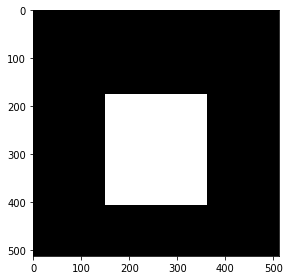

In [3]:
guide_image = io.imread('rect.png').astype(np.float32)
io.imshow(guide_image / 255.)
guide_image_tensor = to_tensor(guide_image)

We can now run the algorithm using TensorFlow. As per TF 1.13.0 and later, Eager mode is recommended. We can set the device using the appropriate context manager.

In [4]:
with tf.device('cpu:0'):
    output = anisotropic_diffusion(input_image_tensor,  # The input image
                                   guide_image_tensor,  # The guide image
                                   second_guide=None,   # An optional second guide image
                                   is_log=False,        # set to True if the image contains log-values
                                   iterations=1000,     # Number of steps for the iterative diffusion
                                   verbose=True)        # set to False to skip the logging of the iteration number
    output = to_numpy(output)

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Iteration 30
Iteration 31
Iteration 32
Iteration 33
Iteration 34
Iteration 35
Iteration 36
Iteration 37
Iteration 38
Iteration 39
Iteration 40
Iteration 41
Iteration 42
Iteration 43
Iteration 44
Iteration 45
Iteration 46
Iteration 47
Iteration 48
Iteration 49
Iteration 50
Iteration 51
Iteration 52
Iteration 53
Iteration 54
Iteration 55
Iteration 56
Iteration 57
Iteration 58
Iteration 59
Iteration 60
Iteration 61
Iteration 62
Iteration 63
Iteration 64
Iteration 65
Iteration 66
Iteration 67
Iteration 68
Iteration 69
Iteration 70
Iteration 71
Iteration 72
Iteration 73
Iteration 74
Iteration 75
Iteration 76
Iteration

Iteration 596
Iteration 597
Iteration 598
Iteration 599
Iteration 600
Iteration 601
Iteration 602
Iteration 603
Iteration 604
Iteration 605
Iteration 606
Iteration 607
Iteration 608
Iteration 609
Iteration 610
Iteration 611
Iteration 612
Iteration 613
Iteration 614
Iteration 615
Iteration 616
Iteration 617
Iteration 618
Iteration 619
Iteration 620
Iteration 621
Iteration 622
Iteration 623
Iteration 624
Iteration 625
Iteration 626
Iteration 627
Iteration 628
Iteration 629
Iteration 630
Iteration 631
Iteration 632
Iteration 633
Iteration 634
Iteration 635
Iteration 636
Iteration 637
Iteration 638
Iteration 639
Iteration 640
Iteration 641
Iteration 642
Iteration 643
Iteration 644
Iteration 645
Iteration 646
Iteration 647
Iteration 648
Iteration 649
Iteration 650
Iteration 651
Iteration 652
Iteration 653
Iteration 654
Iteration 655
Iteration 656
Iteration 657
Iteration 658
Iteration 659
Iteration 660
Iteration 661
Iteration 662
Iteration 663
Iteration 664
Iteration 665
Iteration 666
Iterat

Let's visualize the output. We obtain a triangular heatmap that has been diffused along the square guide. Increasing (resp. decreasing) the number of iterations will make the result look more like (resp. less like) the guide.

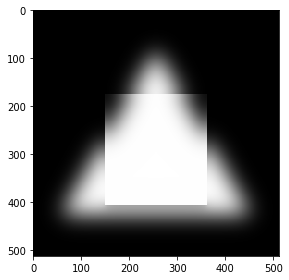

In [5]:
io.imshow(output / 255.)